## Import required modules and load data file

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')
%matplotlib inline

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


## Examine Data

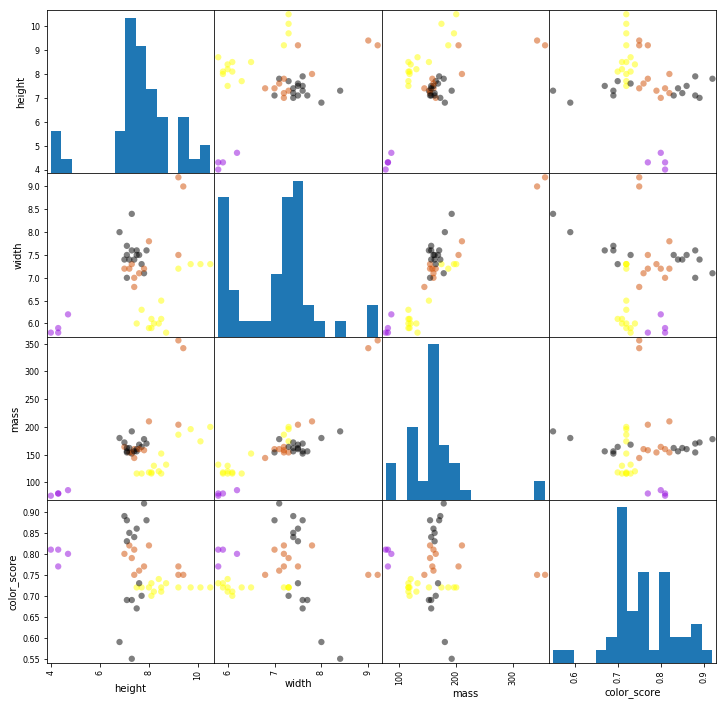

In [7]:
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(12,12), cmap=cmap)

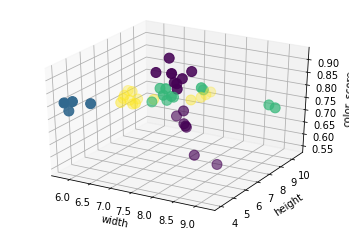

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

## Make a classifier using KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [10]:
# train data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

## Estimate the accuracy of the classifier

In [11]:
knn.score(X_test, y_test)

0.5333333333333333

## Use the trained k-NN classifier model to classify new, previously unseen objects

In [13]:
fruit_prediction = knn.predict([[20, 4.3, 5.5, 0.55]])

In [14]:
fruit_prediction

array([2])

## How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

([<matplotlib.axis.XTick at 0x1a26bf65f8>,
 <a list of 5 Text xticklabel objects>)

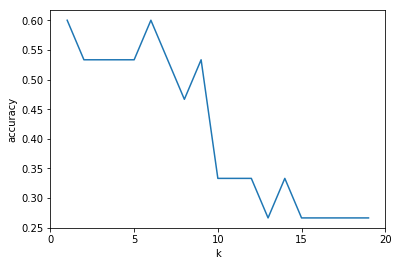

In [16]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, scores)
plt.xticks([0,5,10,15,20])

Based on the scree plot above, out best k value is either 1 or 6. However choosing k = 1 would yield an overfitting issue.